In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [108]:
bihar_state = pd.read_csv("state_level_latest.csv")
bihar_state.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 12 columns):
State                38 non-null object
Confirmed            38 non-null int64
Recovered            38 non-null int64
Deaths               38 non-null int64
Active               38 non-null int64
Last_Updated_Time    38 non-null object
Migrated_Other       38 non-null int64
State_code           38 non-null object
Delta_Confirmed      38 non-null int64
Delta_Recovered      38 non-null int64
Delta_Deaths         38 non-null int64
State_Notes          14 non-null object
dtypes: int64(8), object(4)
memory usage: 3.6+ KB


In [20]:
bihar_state.head()


,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,851261,536544,22699,291636,12/07/2020 14:24:06,382,TT,902,313,12,NaN
1,Maharashtra,246600,136985,10116,99202,12/07/2020 01:51:08,297,MH,0,0,0,297 cases were marked as non-covid deaths in M...
2,Tamil Nadu,134226,85915,1898,46413,11/07/2020 19:07:07,0,TN,0,0,0,2 deaths cross notified to other states from C...
3,Delhi,110921,87692,3334,19895,11/07/2020 19:50:08,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat..."
4,Gujarat,41027,28685,2033,10309,11/07/2020 20:18:07,0,GJ,0,0,0,NaN


In [21]:
bihar_state.shape


(38, 12)

In [22]:
bihar_state.describe()


,Confirmed,Recovered,Deaths,Active,Migrated_Other,Delta_Confirmed,Delta_Recovered,Delta_Deaths
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,44803.210526,28239.157895,1194.684211,15349.263158,20.105263,47.473684,16.473684,0.631579
std,142244.428172,89301.119852,3977.285962,49250.778652,77.156138,195.508310,61.425735,2.198538
min,0.000000,0.000000,0.000000,0.000000,0.000000,-392.000000,0.000000,0.000000
25%,1103.750000,494.500000,2.000000,311.750000,0.000000,0.000000,0.000000,0.000000
50%,5668.000000,3516.500000,35.000000,2688.000000,0.000000,0.000000,0.000000,0.000000
75%,26401.500000,15390.000000,467.250000,8591.500000,2.250000,1.500000,0.000000,0.000000
max,851261.000000,536544.000000,22699.000000,291636.000000,382.000000,902.000000,313.000000,12.000000


In [23]:
missing_values = bihar_state.isnull()
missing_values



,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
state = pd.DataFrame(india[india["State"]=="Bihar"])
total_Cases = state.Confirmed+state.Recovered+state.Deaths
total_Cases


14    26148
dtype: int64

In [25]:
state


,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
14,Bihar,15039,10991,118,3930,11/07/2020 19:14:09,0,BR,0,0,0,NaN


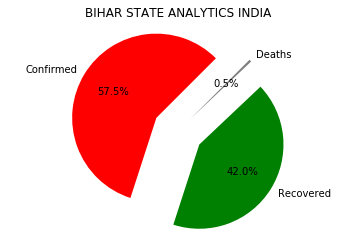

In [41]:
from pandas import DataFrame

Data = {'Cases': [15039,10991,118]}
df = DataFrame(Data,columns=['Cases'])
labels1 = 'Confirmed','Recovered','Deaths'
plt.title('BIHAR STATE ANALYTICS INDIA')
colors1 = ['red','green','grey']
spacing1 = (0.3, 0.3, 0.2)
plt.pie(df, labels=labels1, autopct='%1.1f%%', startangle=45, colors=colors1, explode=spacing1)
plt.axis('equal')
plt.show()

In [120]:
data = pd.read_csv("covid_19_india.csv")
temp = data["State/UnionTerritory"] == 'Bihar'
Bihar = data.loc[temp]
Bihar.Date[0:118:30]



271     22/03/20
1161    21/04/20
2138    21/05/20
3211    20/06/20
Name: Date, dtype: object

In [110]:
data.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2


In [111]:

data_col = []

for col in data.columns:   #printing columns to eliminate column which is not necessay 
    data_col.append(col)
    
data_col

['Sno',
 'Date',
 'Time',
 'State/UnionTerritory',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

In [113]:
data.sample(5).isnull()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
574,False,False,False,False,False,False,False,False,False
3487,False,False,False,False,False,False,False,False,False
3587,False,False,False,False,False,False,False,False,False
3395,False,False,False,False,False,False,False,False,False
3126,False,False,False,False,False,False,False,False,False


In [47]:
bihar_state['Mortality Rate'] = (bihar_state['Confirmed']/bihar_state['Deaths']).round(2)


In [50]:
bihar_state['Recovery Rate'] = (bihar_state['Recovered']/bihar_state['Confirmed']).round(2)


In [51]:
sns.heatmap(bihar_state.corr(),annot=True)


In [60]:
datanew = pd.read_csv('case_time_series.csv')
datanew.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
Date               164 non-null object
Daily Confirmed    164 non-null int64
Total Confirmed    164 non-null int64
Daily Recovered    164 non-null int64
Total Recovered    164 non-null int64
Daily Deceased     164 non-null int64
Total Deceased     164 non-null int64
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


In [61]:
datanew.head(10)


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0
5,04 February,0,3,0,0,0,0
6,05 February,0,3,0,0,0,0
7,06 February,0,3,0,0,0,0
8,07 February,0,3,0,0,0,0
9,08 February,0,3,0,0,0,0


In [62]:
datanew.tail(10)

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
154,02 July,21947,627171,19999,379903,378,18227
155,03 July,22718,649889,14417,394320,444,18671
156,04 July,24018,673907,14746,409066,611,19282
157,05 July,23942,697849,15829,424895,421,19703
158,06 July,22500,720349,15315,440210,473,20176
159,07 July,23147,743496,16836,457046,479,20655
160,08 July,25561,769057,19508,476554,492,21147
161,09 July,25790,794847,19408,495962,479,21626
162,10 July,27762,822609,20289,516251,520,22146
163,11 July,27755,850364,19981,536232,543,22689


In [63]:
datanew1 = pd.read_csv('complete.csv')
datanew1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3825 entries, 0 to 3824
Data columns (total 10 columns):
Date                         3825 non-null object
Name of State / UT           3825 non-null object
Latitude                     3825 non-null float64
Longitude                    3825 non-null float64
Total Confirmed cases        3825 non-null int64
Death                        3825 non-null int64
Cured/Discharged/Migrated    3825 non-null int64
New cases                    3825 non-null int64
New deaths                   3825 non-null int64
New recovered                3825 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 298.9+ KB


In [64]:
datanew1.head(10)


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0
5,2020-02-04,Kerala,10.8505,76.2711,3,0,0,0,0,0
6,2020-02-05,Kerala,10.8505,76.2711,3,0,0,0,0,0
7,2020-02-06,Kerala,10.8505,76.2711,3,0,0,0,0,0
8,2020-02-07,Kerala,10.8505,76.2711,3,0,0,0,0,0
9,2020-02-08,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [66]:
datanew1.tail(10)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
3815,2020-07-12,Puducherry,11.9416,79.8083,1337,18,690,65,1,53
3816,2020-07-12,Punjab,31.1471,75.3412,7587,195,5040,230,8,23
3817,2020-07-12,Rajasthan,27.0238,74.2179,23748,503,17869,574,6,249
3818,2020-07-12,Sikkim,27.5330,88.5122,151,0,80,17,0,0
3819,2020-07-12,Tamil Nadu,11.1271,78.6569,134226,1898,85915,3965,69,3591
3820,2020-07-12,Telangana,18.1124,79.0193,33402,348,20919,1178,9,1714
3821,2020-07-12,Tripura,23.9408,91.9882,1949,2,1375,31,1,3
3822,2020-07-12,Uttar Pradesh,26.8467,80.9462,35092,913,22689,1392,24,902
3823,2020-07-12,Uttarakhand,30.0668,79.0193,3417,46,2718,44,0,12
3824,2020-07-12,West Bengal,22.9868,87.8550,28453,906,17959,1344,26,611


In [67]:
d1 = pd.read_csv('state.csv')
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 41 columns):
Date      357 non-null object
Status    357 non-null object
TT        357 non-null int64
AN        357 non-null int64
AP        357 non-null int64
AR        357 non-null int64
AS        357 non-null int64
BR        357 non-null int64
CH        357 non-null int64
CT        357 non-null int64
DN        357 non-null int64
DD        357 non-null int64
DL        357 non-null int64
GA        357 non-null int64
GJ        357 non-null int64
HR        357 non-null int64
HP        357 non-null int64
JK        357 non-null int64
JH        357 non-null int64
KA        357 non-null int64
KL        357 non-null int64
LA        357 non-null int64
LD        357 non-null int64
MP        357 non-null int64
MH        357 non-null int64
MN        357 non-null int64
ML        357 non-null int64
MZ        357 non-null int64
NL        357 non-null int64
OR        357 non-null int64
PY        357 non-null 

In [71]:
d1.head()
d1['Status'].unique()



array(['Confirmed', 'Recovered', 'Deceased'], dtype=object)

In [76]:

d1['Status'] = d1['Status'].replace("Confirmed", "0")
d1['Status'] = d1['Status'].replace("Recovered", "1")
d1['Status'] = d1['Status'].replace("Deceased", "2")

d1.head()



,Date,Status,TT,AN,AP,AR,AS,BR,CH,CT,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,0,81,0,1,0,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,1,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,0,27,0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,1,4,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [78]:
d1.columns


Index(['Date', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN',
       'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD',
       'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN',
       'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [80]:

x = d1[['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN', 'DD',
       'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD', 'MP',
       'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN', 'TG',
       'TR', 'UP', 'UT', 'WB', 'UN']] .values  
x[0:5]


array([[81,  0,  1,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0, 14,  0,  2,
         0,  6, 19,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  1,  3,  0,
         1,  1,  0, 12,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  0,  4,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  2,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  1,  0,  0,  0,  0,  0]], dtype=int64)

In [81]:
y = d1['Status'].values
y[0:5]

array(['0', '1', '2', '0', '1'], dtype=object)

In [84]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.62373706, -0.32453617, -0.44654347, -0.3046312 , -0.44017774,
        -0.59830945, -0.38957995, -0.51589193, -0.33299692,  0.        ,
        -0.53463575, -0.41722886, -0.84237264, -0.47057974, -0.56162429,
        -0.56587247, -0.49814426, -0.37589416, -0.19824055, -0.27835396,
         0.        , -0.86965095, -0.63352822, -0.38689116, -0.15703169,
        -0.21667963, -0.32872659, -0.51703245, -0.38309254, -0.45232962,
        -0.77834302, -0.18133977, -0.56689176, -0.39150599, -0.40630124,
        -0.5969535 , -0.5071805 , -0.60619091, -0.05991803],
       [-0.63577367, -0.32453617, -0.45067867, -0.3046312 , -0.44017774,
        -0.59830945, -0.38957995, -0.51589193, -0.33299692,  0.        ,
        -0.54051953, -0.41722886, -0.84237264, -0.54864266, -0.56162429,
        -0.59259599, -0.49814426, -0.39352771, -0.48020021, -0.27835396,
         0.        , -0.86965095, -0.64194987, -0.38689116, -0.15703169,
        -0.21667963, -0.32872659, -0.51703245, -0.38309254, -0.

In [85]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=2)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (285, 39) (285,)
Test set: (72, 39) (72,)


In [86]:

k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [87]:
yhat = neigh.predict(x_test)  
yhat[0:5]

array(['2', '2', '2', '2', '1'], dtype=object)

In [88]:
score = neigh.score(x_test, y_test)
print("Model accuracy is {}".format(score.round(2)))

Model accuracy is 0.69


In [90]:
accu = pd.read_csv('PAML_COVID_Dataset Sheet1.csv')
accu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 12 columns):
Date                        3135 non-null object
Time                        3135 non-null object
State/UnionTerritory        3135 non-null object
ConfirmedIndianNational     3135 non-null object
Gender                      3135 non-null object
ConfirmedForeignNational    3135 non-null object
Age                         3135 non-null int64
Serious symptoms            3135 non-null object
Less common symptoms        3135 non-null object
Most common symptoms        3135 non-null object
Severity                    3135 non-null object
Patient_Status              3135 non-null object
dtypes: int64(1), object(11)
memory usage: 294.0+ KB


In [92]:
accu.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious symptoms,Less common symptoms,Most common symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,Male,0,77,loss of speech or movement,"a rash on skin, or discolouration of fingers o...",dry cough,Mild,flu
1,31/01/20,6:00 PM,Kerala,1,Female,0,23,chest pain or pressure,loss of taste or smell,dry cough,Seviour,Covid
2,1/2/2020,6:00 PM,Kerala,2,Male,0,90,difficulty breathing or shortness of breath,conjunctivitis,tiredness,Seviour,Covid
3,2/2/2020,6:00 PM,Kerala,3,Female,0,18,difficulty breathing or shortness of breath,diarrhoea,fever,Seviour,Covid
4,3/2/2020,6:00 PM,Kerala,3,Male,0,24,chest pain or pressure,diarrhoea,tiredness,Seviour,Covid


In [93]:
labelEncoder = LabelEncoder()
x[:,0] = labelEncoder.fit_transform(x[:,0])
x[:,2] = labelEncoder.fit_transform(x[:,2])
x[:,5] = labelEncoder.fit_transform(x[:,5])
x[:,6] = labelEncoder.fit_transform(x[:,6]) 

x[:,7] = labelEncoder.fit_transform(x[:,7])
x[:,8] = labelEncoder.fit_transform(x[:,8])
x[:,9] = labelEncoder.fit_transform(x[:,9])

In [94]:
x1 = pd.DataFrame(x)
x1

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,43.0,-0.324536,1.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.452330,-0.778343,-0.181340,-0.566892,-0.391506,-0.406301,-0.596954,-0.507181,-0.606191,-0.059918
1,8.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.792160,-0.181340,-0.567837,-0.394225,-0.406301,-0.629682,-0.507181,-0.606191,-0.059918
2,2.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.799069,-0.181340,-0.567837,-0.394225,-0.406301,-0.646046,-0.507181,-0.606191,-0.059918
3,18.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.792160,-0.181340,-0.567837,-0.388787,-0.406301,-0.641955,-0.507181,-0.606191,-0.059918
4,4.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.785252,-0.181340,-0.567837,-0.391506,-0.406301,-0.646046,-0.507181,-0.606191,-0.059918
5,0.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.799069,-0.181340,-0.567837,-0.394225,-0.406301,-0.646046,-0.507181,-0.606191,-0.059918
6,13.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.799069,-0.181340,-0.567837,-0.391506,-0.406301,-0.646046,-0.477619,-0.606191,-0.059918
7,1.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.799069,-0.181340,-0.566892,-0.394225,-0.406301,-0.646046,-0.507181,-0.606191,-0.059918
8,0.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.799069,-0.181340,-0.567837,-0.394225,-0.406301,-0.646046,-0.507181,-0.606191,-0.059918
9,9.0,-0.324536,0.0,-0.304631,-0.440178,0.0,0.0,0.0,0.0,0.0,...,-0.465561,-0.799069,-0.181340,-0.567837,-0.391506,-0.406301,-0.637864,-0.507181,-0.601418,-0.059918
